In [1]:
%matplotlib inline

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm
import astropy.visualization as vis
import luptonRGB
from PIL import Image

In [106]:
data=scipy.io.loadmat("cutouts_threedet_tracklets_303482")
cutouts=data["cutouts"]
Q=5

for i in range(len(cutouts)):
    if not np.isnan(np.sum(cutouts[i][0])):
        template=cutouts[i][0]
        science=cutouts[i][1]
        difference=cutouts[i][2]

        stitched_array=np.concatenate((template,science,difference),axis=1)
        minimum = stitched_array.min()
        Q=5
        scaled=luptonRGB.makeRGB(stitched_array,Q=Q,minimum=minimum)
        template=scaled[:,:20,0]
        science=scaled[:,21:41,0]
        difference=scaled[:,40:,0]

        f, (ax1, ax2, ax3) = plt.subplots(1, 3)

        ax1.imshow(template,cmap=cm.viridis,interpolation="none")
        ax1.axis('off')
        ax2.imshow(science,cmap=cm.viridis,interpolation="none")
        ax2.axis('off')
        ax3.imshow(difference,cmap=cm.viridis,interpolation="none")
        ax3.axis('off')
        plt.tight_layout(w_pad=-1.5)
        plt.savefig('sub_sets/Asteroids/ast'+str(i)+'.jpg',bbox_inches='tight')
        plt.close()


KeyboardInterrupt: 

In [3]:
#template
#plt.imshow(cutouts[2][0],cmap=cm.viridis,interpolation="none")

In [4]:
#science
#plt.imshow(cutouts[2][1])

In [5]:
#difference
#plt.imshow(cutouts[2][2])

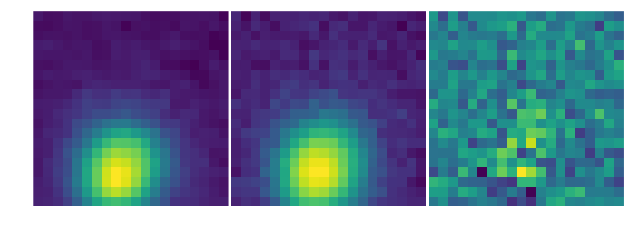

In [68]:
#Scale arrays individually and then concatenate

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
min_cut=0 #-1
Q=5
max_cut=0 #cutouts[8][0].max()
tryRGB=True
template=vis.scale_image(cutouts[8][0],min_cut=min_cut,max_cut=max_cut)
science=vis.scale_image(cutouts[8][1],min_cut=min_cut,max_cut=max_cut)
difference=vis.scale_image(cutouts[8][2],min_cut=min_cut,max_cut=None)

if tryRGB==True:
    template=cutouts[8][0]
    science=cutouts[8][1]
    difference=cutouts[8][2]
    mintemp = template.min()
    minsci = science.min()
    mindiff = difference.min()
    template = luptonRGB.makeRGB(template,Q=Q,minimum=mindiff)
    science = luptonRGB.makeRGB(science,Q=Q,minimum=mindiff)
    difference = luptonRGB.makeRGB(difference,Q=Q,minimum=mindiff)
    
ax1.imshow(template[:,:,0],cmap=cm.viridis,interpolation="none")
ax1.axis('off')
ax2.imshow(science[:,:,0],cmap=cm.viridis,interpolation="none")
ax2.axis('off')
ax3.imshow(difference[:,:,0],cmap=cm.viridis,interpolation="none")
ax3.axis('off')
plt.tight_layout(pad=-0.5, w_pad=-1.5, h_pad=-1.5)
plt.savefig('sub_sets/test.jpg')

#arcsinh scaling,log,sqrt


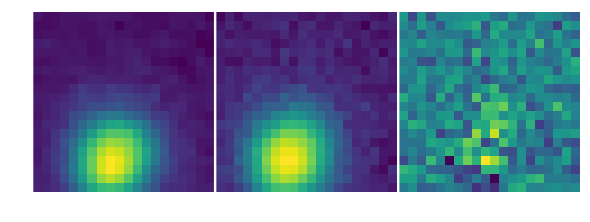

In [103]:
#Concatenate arrays and then scale

template=cutouts[8][0]
science=cutouts[8][1]
difference=cutouts[8][2]

stitched_array=np.concatenate((template,science,difference),axis=1)
minimum = stitched_array.min()
Q=5
scaled=luptonRGB.makeRGB(stitched_array,Q=Q,minimum=minimum)
template=scaled[:,:20,0]
science=scaled[:,21:41,0]
difference=scaled[:,40:,0]

f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(template,cmap=cm.viridis,interpolation="none")
ax1.axis('off')
ax2.imshow(science,cmap=cm.viridis,interpolation="none")
ax2.axis('off')
ax3.imshow(difference,cmap=cm.viridis,interpolation="none")
ax3.axis('off')
plt.tight_layout(w_pad=-1.5)
plt.savefig('sub_sets/test.jpg',bbox_inches='tight')

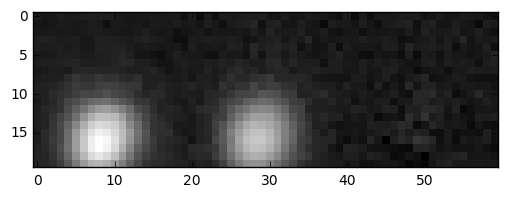

In [8]:
plt.imshow(scaled[:,:,0],cmap=cm.gray,interpolation="none")


In [24]:
scaled[:,:,0]

array([[31, 24, 24, ..., 25, 21, 18],
       [23, 21, 24, ..., 12, 31, 28],
       [25, 26, 27, ..., 31, 21, 18],
       ..., 
       [34, 40, 57, ..., 27, 17, 12],
       [36, 38, 52, ..., 24, 24, 21],
       [38, 39, 45, ..., 28, 25, 26]], dtype=uint8)

In [27]:
luptonRGB.makeRGB?